<a href="https://colab.research.google.com/github/Ramjeet-Dixit/IITM-AIML-Rdixit/blob/main/Bodhak_classification_trees_in_python_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recap:

1. Drawbacks or weaknesses of logistic regression
2. Understood the working of tree based models
3. ROC curves and their usage in logistics regression
4. Balancing of weights in logistics: imbalanced data: class_weight
5. Conventional logit method
6. Importing data from UCI ML repository

# Classification Trees in Python, From Start to Finish


----

In this lesson we will use **scikit-learn**  to build this **Classification Tree** (below), which uses continuous and categorical data from the **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)** to predict whether or not a patient has **[heart disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**:


**Classification Trees** are an exceptionally useful machine learning method when you need to to know how the decisions are being made. For example, if you have to justify the predictions to your boss, **Classification Trees** are a good method because each step in the decision making process is easy to understand.

In this lesson you will learn about...

- **[Importing Data](#download-the-data)**

- **[Missing Data](#identify-and-deal-with-missing-data)**
    - Identifying Missing Data
    - Dealing with Missing Data
    

- **[Formatting the Data for Decision Trees](#format-the-data)**

    - Splitting data into Dependent and Independent Variables
    - One-Hot-Encoding
    

- **[Building a Preliminary Classification Tree](#build-tree)**


- **[Building, Drawing, Interpreting and Evaluating the Final Classification Tree](#draw-tree)**


#### Also Note:
I strongly encourage you to play around with the code. Playing with the code is the best way to learn from it.

***

# Import the modules that will do all the work
The very first thing we do is load in a bunch of python modules. Python, itself, just gives us a basic programming language. These modules give us extra functionality to import the data, clean it up and format it, and then build, evaluate and draw the classification tree.

In [1]:
import pandas as pd # to load and manipulate data and for One-Hot Encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.metrics import confusion_matrix, classification_report # to create a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # to draw a confusion matrix

----

<a id="download-the-data"></a>
# Import the data
Now we load in a dataset from the **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)**.
Specifically, we are going to use the **[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**. This dataset will allow us to predict if someone has heart disease based on their sex, age, blood pressure and a variety of other metrics.

**NOTE:** When **pandas** (**pd**) reads in data, it returns a **dataframe**, which is a lot like a spreadsheet. The data are organized in rows and columns and each row can contain a mixture of text and numbers. The standard variable name for a **dataframe** is the initials **df**, and that is what we will use here:

In [2]:
## since we have already downloaded the data to a file, we can load the file...
df = pd.read_csv('/Users/ramjeetdixit/Desktop/AI ML /heart+disease/processed.cleveland.data', header=None)

df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


Now that we have loaded the data into a **dataframe** called **df**, let's look at the first five rows using the `head()` function:

In [3]:
## print the first 5 rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We see that instead of nice column names, we just have column numbers.  Since nice column names would make it easier to know how to format the data, let's replace the column numbers with the following column names:
- **age**,
- **sex**,
- **cp**, chest pain
- **restbp**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar
- **restecg**, resting electrocardiographic results
- **thalach**,  maximum heart rate achieved
- **exang**, exercise induced angina
- **oldpeak**, ST depression induced by exercise relative to rest
- **slope**, the slope of the peak exercise ST segment.
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, this is short of thalium heart scan.
- **hd**, diagnosis of heart disease, the predicted attribute

In [4]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [5]:
## change the column numbers to column names
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
## print the first 5 rows (including the column names)
df.head(5)

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Hooray! We have replaced the column numbers with nice, easy to remember names. Now that we have the data in a **dataframe** called **df**, we are ready to identify and deal with **Missing Data**.

***

<a id="identify-and-deal-with-missing-data"></a>
# Missing Data Part 1: Identifying Missing Data
Unfortunately, the biggest part of any data analysis project is making sure that the data is correctly formatted and fixing it when it is not. The first part of this process is identifying and dealing with **Missing Data**.

**Missing Data** is simply a blank space, or a surrogate value like **NA**, that indicates that we failed to collect data for one of the features. For example, if we forgot to ask someone's age, or forgot to write it down, then we would have a blank space in the dataset for that person's **age**.

There are two main ways to deal with missing data:
1. We can remove the rows that contain missing data from the dataset. This is relatively easy to do, but it wastes all of the other values that we collected. How a big of a waste this is depends on how important this missing value is for classification. For example, if we are missing a value for **age**, and **age** is not useful for classifying if people have heart disease or not, then it would be a shame to throw out all of someone's data just because we do not have their **age**.
2. We can **impute** the values that are missing. In this context **impute** is just a fancy way of saying "we can make an educated guess about about what the value should be". Continuing our example where we are missing a value for **age**, instead of throwing out the entire row of data, we can fill the missing value with the average age or the median age, or use some other, more sophisticated approach, to guess at an appropriate value.

In this section, we'll focus on identifying missing values in the dataset.

First, let's see what sort of data is in each column.

In [6]:
df.head(2)

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [8]:
df.isna().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [9]:
## dtypes tell us the "data type" for each column
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

We see that that they are almost all `float64`, however, two columns, **ca** and **thal**, have the `object` type and one column, **hd** has `int64`.

The fact that the **ca** and **thal** columns have `object` data types suggests there is something funny going on in them. `object` datatypes are used when there are mixtures of things, like a mixture of numbers and letters. In theory, both **ca** and **thal** should just have a few values representing different categories, so let's investigate what's going on by printing out their unique values. We'll start with **ca**:

In [10]:
## print out unique values in the column called 'ca'
df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

We see that **ca** contains numbers (0.0, 3.0, 2.0 and 1.0) and questions marks (?). The numbers represent the number of blood vessels that we lit up by fluoroscopy and the question marks represent missing data.

Now let's look at the unique values in **thal**.

In [11]:
## print out unique values in the column called 'thal'
df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

Again, **thal** also contains a mixture of numbers, representing the different diagnoses from the thalium heart scan, and question marks, which represent missing values.

Now that we have identified some missing values, we need to deal with them.

----

# Missing Data Part 2: Dealing With Missing Data

Since scikit-learn's classification trees do not support datasets with missing values, we need to figure out what to do these question marks. We can either delete these patients from the training dataset, or impute values for the missing data. First let's see how many rows contain missing values.

In [12]:
## print out the rows that contain ?.
df[(df['ca'] == '?')
       |
       (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [13]:
## print the number of rows that contain missing values.
##
## loc[], short for "location", let's us specify which rows we want...
## and so we say we want any row with '?' in column 'ca'
## OR
## any row with '?' in column 'thal'
##
## len(), short for "length", prints out the number of rows.
len(df[(df['ca'] == '?')
           |
           (df['thal'] == '?')])

6

Since only 6 rows have missing values, let's look at them.

Now let's count the number of rows in the full dataset.

In [14]:
len(df)

303

So 6 of the **303** rows, or **2%**, contain missing values. Since **303 - 6 = 297**, and **297** is plenty of data to build a classification tree, we will remove the rows with missing values, rather than try to impute their values.

**NOTE:** Imputing missing values is a big topic that we will tackle in another webinar. By taking the "easy" route by just deleting rows with missing values, we can stay focused on **Decision Trees**.  

We remove the rows with missing values by selecting all of the rows that *do not* contain question marks in either the **ca** or **thal** columns:

In [15]:
## use loc[] to select all rows that do not contain missing values
## and save them in a new dataframe called "df_no_missing"
df_no_missing = df[(df['ca'] != '?')
                       &
                       (df['thal'] != '?')]

Since `df_no_missing` has **6** fewer rows than the original `df`, it should have **297** rows.

In [16]:
len(df_no_missing)
#out of 303

297

Hooray! The math works out. However, we can also make sure **ca** no longer contains question marks by printing its unique values:

In [17]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

And we can also do the same thing for **thal**:

In [18]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

We have verified that `df_no_missing` does not contain any missing values. **NOTE:** **ca** and **thal** still have the `object` data type. That's OK. Now we are ready to format the data for making a **Classification Tree**.


In [19]:
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


----

<a id="format-the-data"></a>
# Format Data Part 1: Split the Data into Dependent and Independent Variables

Now that we have taken care of the missing data, we are ready to start formatting the data for making a **Classification Tree**.

The first step is to split the data into two parts:
1. The columns of data that we will use to make classifications
2. The column of data that we want to predict.

We will use the conventional notation of `X` (capital **X**) to represent the columns of data that we will use to make classifications and `y` (lower case **y**) to represent the thing we want to predict. In this case, we want to predict **hd** (heart disease).

**NOTE:** The reason we deal with missing data before splitting it into **X** and **y** is that if we need to remove rows, splitting after ensures that each row in **X** correctly corresponds with the appropriate value in **y**.

**ALSO NOTE:** In the code below we are using `copy()` to copy the data *by value*. By default, pandas uses copy *by reference*. Using `copy()` ensures that the original data `df_no_missing` is not modified when we modify `X` or `y`. In other words, if we make a mistake when we are formatting the columns for classification trees, we can just re-copy `df_no_missing`, rather than reload the original data and remove the missing values etc.

In [20]:
## Make a new copy of the columns used to make predictions
X = df_no_missing.drop('hd', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1]
X.head(2)

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0


In [21]:
## Make a new copy of the column of data we want to predict
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

Now that we have created **X**, which has the data we want to use to make predictions, and **y**, which has the data we want to predict, we are ready to continue formatting **X** so that it is suitable for making a **Decision Tree**.

----

<a id="one-hot-encoding"></a>
# Format the Data Part 2: One-Hot Encoding

Now that we have split the dataframe into two pieces, `X`, which contains the data we will use to  predict classifications, and `y`, which contains the known classifications in our training dataset, we need to take a closer look at the variables in `X`. The list bellow tells us what each variable represents and the type of data (**float** or **categorical**) it should contain:

- **age**, **Float**
- **sex** - **Category**
  - 0 = female
  - 1 = male
- **cp**, chest pain, **Category**
  - 1 = typical angina
  - 2 = atypical angina
  - 3 = non-anginal pain
  - 4 = asymptomatic
- **restbp**, resting blood pressure (in mm Hg), **Float**
- **chol**, serum cholesterol in mg/dl, **Float**
- **fbs**, fasting blood sugar, **Category**
  - 0 = >=120 mg/dl
  - 1 = <120 mg/dl
- **restecg**, resting electrocardiographic results, **Category**
  - 1 = normal
  - 2 = having ST-T wave abnormality
  - 3 = showing probable or definite left ventricular hypertrophy
- **thalach**,  maximum heart rate achieved, **Float**
- **exang**, exercise induced angina, **Category**
  - 0 = no
  - 1 = yes
- **oldpeak**, ST depression induced by exercise relative to rest. **Float**
- **slope**, the slope of the peak exercise ST segment, **Category**
  - 1 = upsloping
  - 2 = flat
  - 3 = downsloping
- **ca**, number of major vessels (0-3) colored by fluoroscopy, **Float**
- **thal**, thalium heart scan, **Category**
  - 3 = normal (no cold spots)
  - 6 = fixed defect (cold spots during rest and exercise)
  - 7 = reversible defect (when cold spots only appear during exercise)

Now, just to review, let's look at the data types in `X` to remember how python is seeing the data right now.

In [22]:
df_no_missing.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [23]:
X["slope"].unique()

array([3., 2., 1.])

In [24]:
X["thal"].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [25]:
X.cp.unique()

array([1., 4., 3., 2.])

In [26]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

So, we see that **age**, **restbp**, **chol** and **thalach** are all `float64`, which is good, because we want them to be floating point numbers. All of the other columns, however, need to be inspected to make sure they only contain reasonable values, and some of them need to change. This is because, while **scikit learn Decision Trees** natively support continuous data, like resting blood preasure (**restbp**) and maximum heart rate (**thalach**), they do not natively support categorical data, like chest pain (**cp**), which contains 4 different categories. Thus, in order to use categorical data with **scikit learn Decision Trees**, we have to use a trick that converts a column of categorical data into multiple columns of binary values. This trick is called **One-Hot Encoding**.

At this point you may be wondering, "what's wrong with treating categorical data like continuous data?" To answer that question, let's look at an example: For the **cp** (chest pain) column, we have 4 options:
1. typical angina
2. atypical angina
3. non-anginal pain
4. asymptomatic

If we treated these values, 1, 2, 3 and 4, like continuous data, then we would assume that 4, which means "asymptomatic", is more similar to 3, which means "non-anginal pain", than it is to 1 or 2, which are other types of chest pain. That means the decision tree would be more likely to cluster the patients with 4s and 3s together than the patients with 4s and 1s together. In contrast, if we treat these numbers like categorical data, then we treat each one as a separate category that is no more or less similar to any of the other categories. Thus, the likelihood of clustering patients with 4s with 3s is the same as clustering 4s with 1s, and that approach is more reasonable.

Now let's inspect and, if needed, convert the columns that contain categorical and integer data into the correct datatypes. We'll start with **cp** (chest pain) by inspecting all of its unique values:
<!-- We'll start with the three colunms that should only contain 0s and 1s. **sex**. First, let's make sure it only contains `0` (for **female**) and `1` (for **male**). -->

In [27]:
X['restecg'].unique()

array([2., 0., 1.])

So, the good news is that **cp** only contains the values it is supposed to contain, so we will convert it, using **One-Hot Encoding**, into a series of columns that only contains **0s** and **1s**.

<!-- Now we need to deal with **cp** (chest pain), **restecg** (resting electrocardiographic results), **slope** (the slope of the peak exercise ST segment) and **thal** (thalium heart scan).
 -->
**NOTE:** There are many different ways to do **One-Hot Encoding** in Python. Two of the more popular methods are `ColumnTransformer()` (from **scikit-learn**) and `get_dummies()` (from **pandas**), and the both methods have pros and cons. `ColumnTransformer()` has a very cool feature where it creates a persistent function that can validate data that you get in the future. For example, if you build your **Decision Tree** using a categorical variable **favorite color** that has **red**, **blue** and **green** options, then `ColumnTransformer()` can remember those options and later on when your **Decision Tree** is being used in a production system, if someone says their favorite color is **orange**, then `ColumnTransformer()` can throw an error or handle the situation in some other nice way. The downside of `ColumnTransformer()` is that it turns your data into an array and looses all of the column names, making it harder to verify that your usage of `ColumnTransformer()` worked as you intended it to. In contrast, `get_dummies()` leaves your data in a dataframe and retains the column names, making it much easier to verify that it worked as intended. However, it does not have the persistent behavior that `ColumnTransformer()` has. So, for the sake of learning how **One-Hot Encoding** works, I prefer to use `get_dummies()`. However, once you are comfortable with **One-Hot Encoding**, I encourage you to investigate using `ColumnTransformer()`.

First, before we commit to converting **cp** with **One-Hot Encoding**, let's just see what happens when we convert **cp** without saving the results. This will make it easy to see how `get_dummies()` works.

In [28]:
## For this tutorial, we will use get_dummies() to do One-Hot Encoding,
## but just know that there are other optio/ns.
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,True,False,False,False
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False,False,True,False
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False,True,False,False


As we can see in the printout above, `get_dummies()` puts all of the columns it does not process in the front and it puts **cp** at the end. It also splits **cp** into **4** columns, just like we expected it. **cp_1.0** is `1` for any patient that scored a **1** for chest pain and `0` for all other patients. **cp_2.0** is `1` for any patient that scored **2** for chest pain and `0` for all other patients. **cp_3.0** is `1` for any patient that scored **3** for chest pain and **cp_4.0** is `1` for any patient that scored **4** for chest pain.

Now that we see how `get_dummies()` works, let's use it on the four categorical columns that have more than 2 categories and save the result.

**NOTE:** In a real situation (not a tutorial like this), you should verify all 5 of these columns
only contain the accepted categories. However, for this tutorial, I've already done that for us, so we can skip that step.

In [29]:
X#dataframe of inputs

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [30]:
X_encoded = pd.get_dummies(X, columns=['cp',
                                       'restecg',
                                       'slope',
                                       'thal'],dtype=int)
#dtype=int is in case you get boolean resuslt instead of integer
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [31]:
X_encoded.shape

(297, 22)


Now we need to talk about the **3** categorical columns that only contain **0**s and **1**s: **sex**, **fbs** (fasting blood sugar), and **exang** (exercise induced angina). As we can see, **One-Hot Encoding** converts a column with more than **2** categories, like **cp** (chest pain) into multiple columns of **0**s and **1**s. Since **sex**, **fbs**, and **exang** only have **2** categories and only contain **0**s and **1**s to begin with, we do not have to do anything special to them, so we're done formatting the data for the **Classification Tree**.

**NOTE:** In practice we would use `unique()` to verify that they only contain **0**s and **1**s, but to save time...trust me!

Now, one last thing before we build a **Classification Tree**.  `y` doesn't just contain **0**s and **1**s. Instead, it has **5** different levels of heart disease. **0 =** no heart disease and **1-4** are various degrees of heart disease. We can see this with `unique()`:

In [32]:
y.value_counts()

hd
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

In [33]:
y[y>0] = 1
y.value_counts()

hd
0    160
1    137
Name: count, dtype: int64

We have finally finished formatting the data for making a **Classification Tree**, so let's do it!!!

----

<a id="build-tree"></a>
# Build A Preliminary Classification Tree
At long last, the data are correctly formatted for making a **Classification Tree**. Now we simply split the data into **training** and **testing** sets and build the tree.

In [34]:
## split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train.shape, X_test.shape

((222, 22), (75, 22))

In [35]:
## create a decisiont tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)

clf_dt = clf_dt.fit(X_train, y_train)

In [36]:
X_encoded.columns

Index(['age', 'sex', 'restbp', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0',
       'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0',
       'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

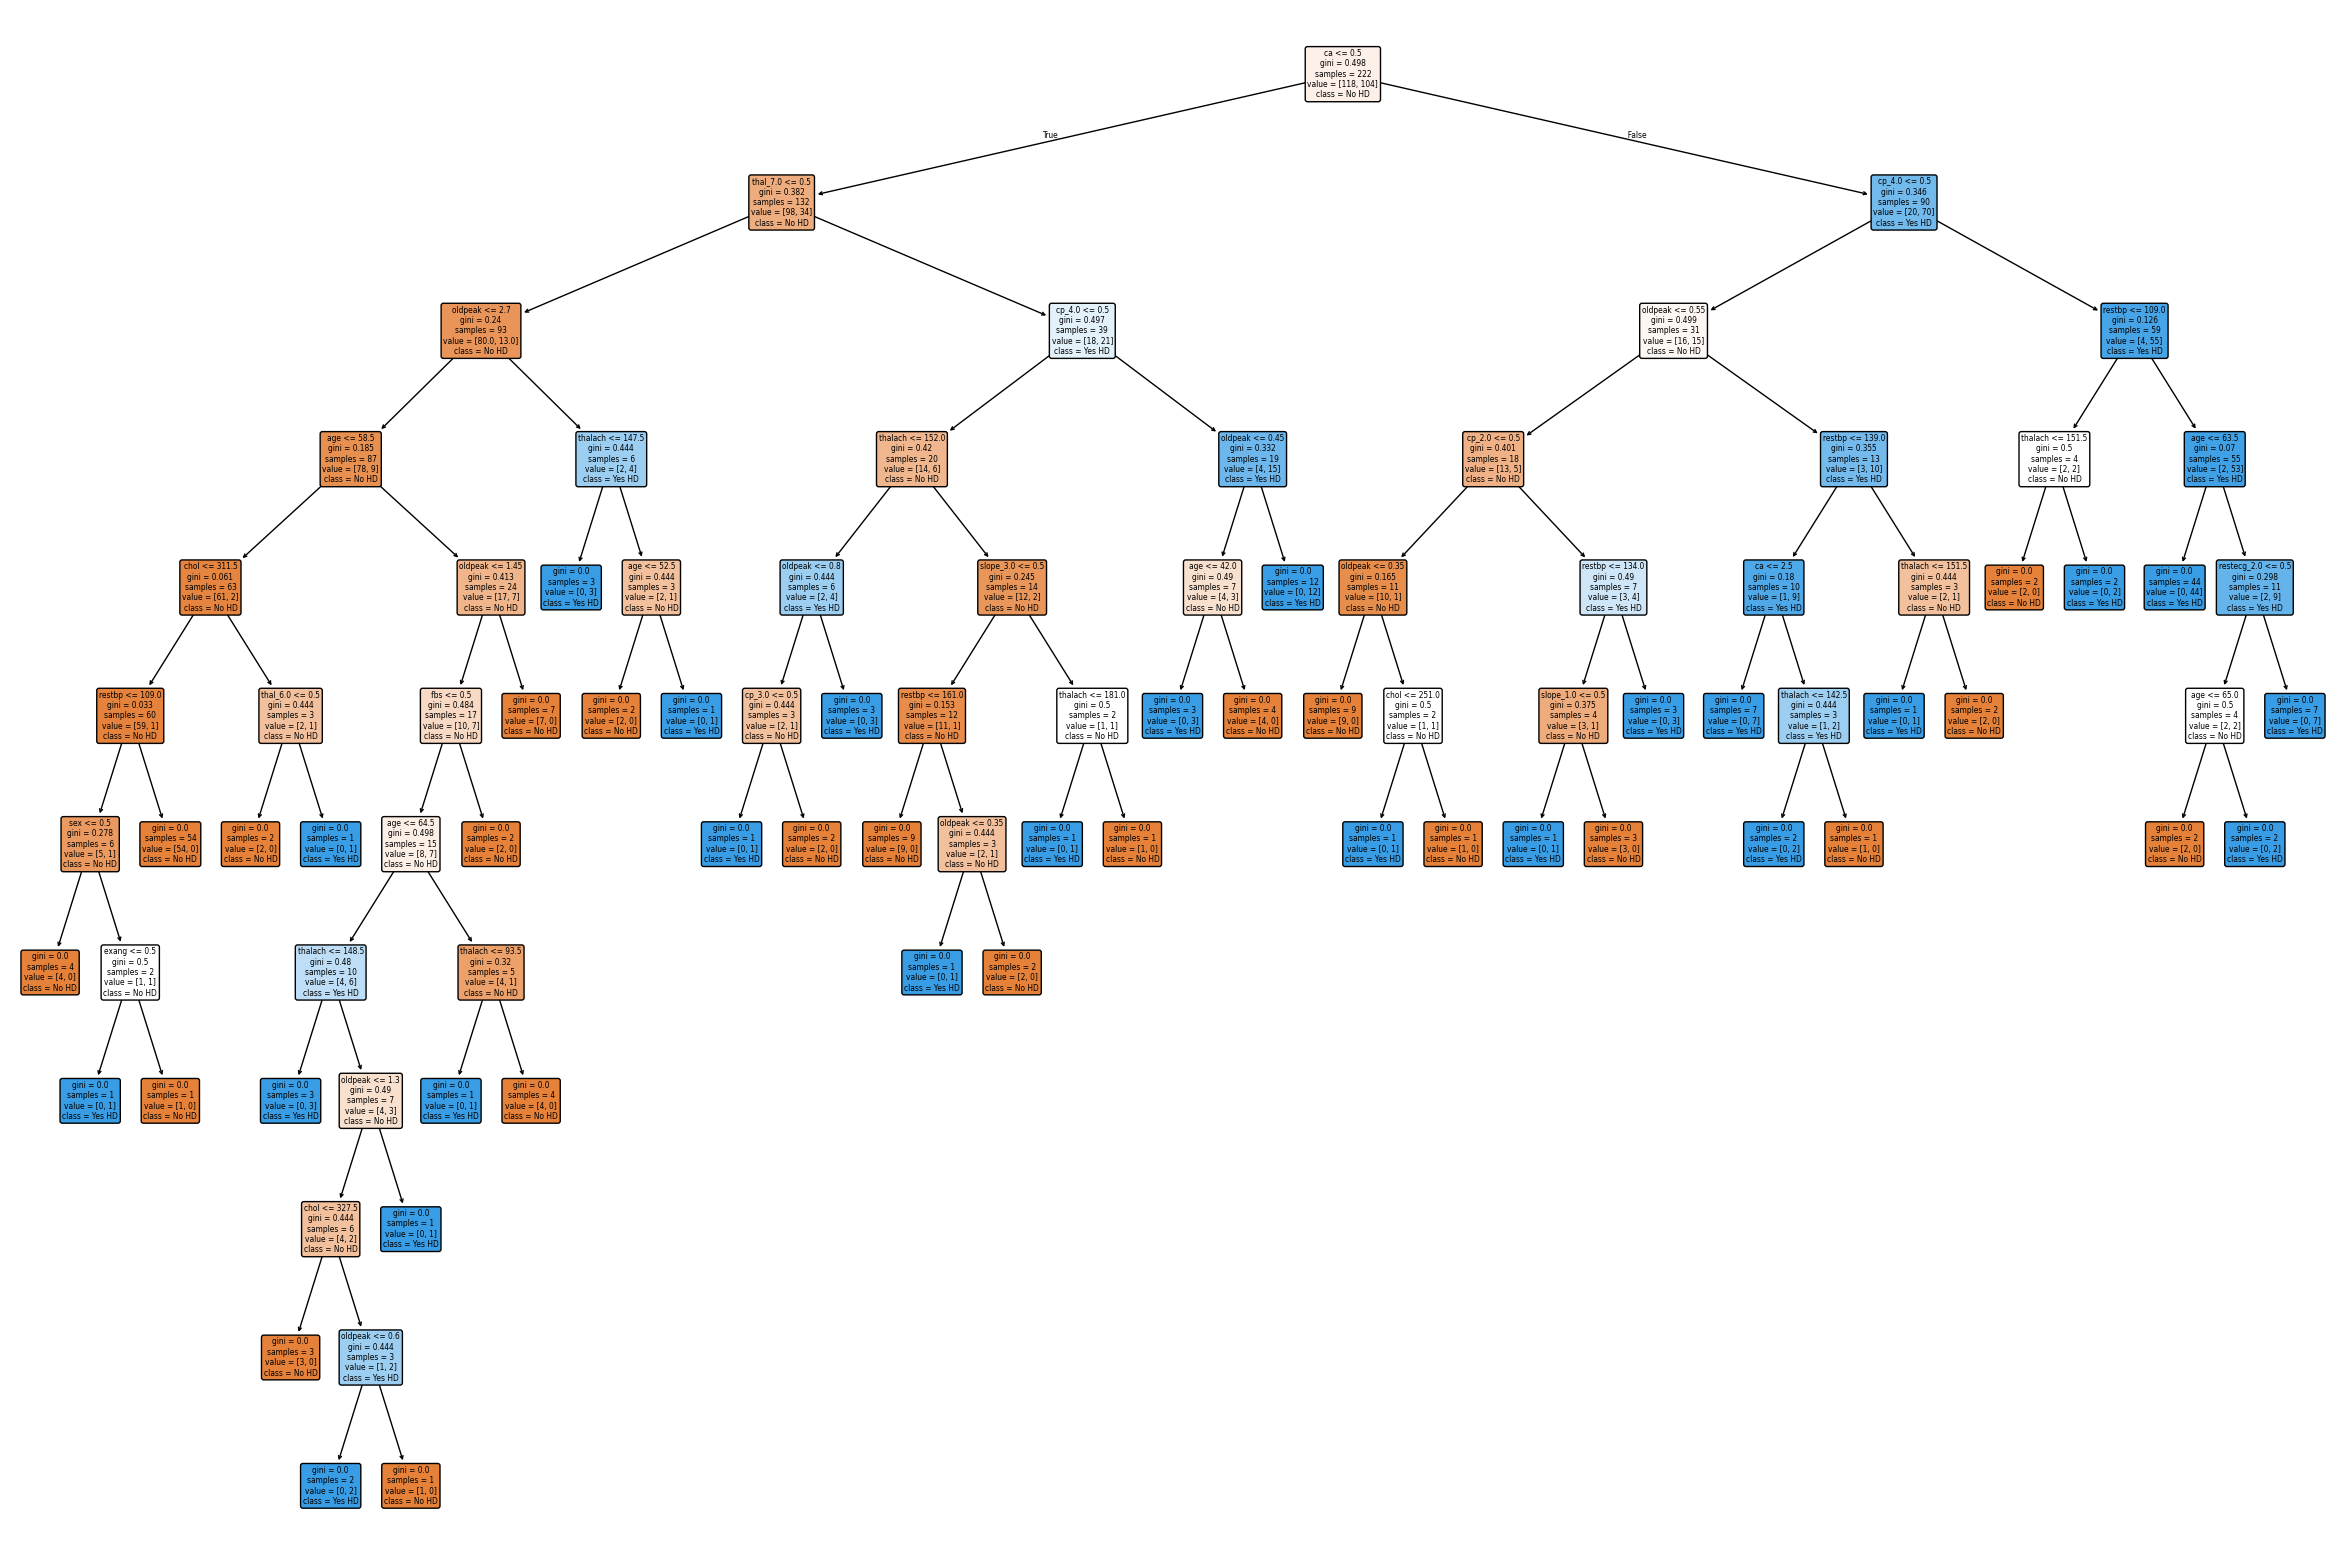

In [37]:
## NOTE: We can plot the tree and it is huge!
plt.figure(figsize=(30, 20))

plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns);

OK, we've built a **Classification Tree** for classification. Let's see how it performs on the **Testing Dataset** by running the **Testing Dataset** down the tree and drawing a **Confusion Matrix**.

In [38]:
#predictions on the test data
y_pred = clf_dt.predict(X_test)

In [39]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1])

In [40]:
#accuracy metrics
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[31 11]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        42
           1       0.70      0.79      0.74        33

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.77      0.76      0.76        75



In [41]:
#predictions on train data for overfitting
y_pred_train = clf_dt.predict(X_train)

In [42]:
print(confusion_matrix(y_train, y_pred_train))

print(classification_report(y_train, y_pred_train))

[[118   0]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       104

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222



In the confusion matrix, we see that of the **31 + 11 = 42** people that did not have **Heart Disease**, **31 (74%)** were correctly classified. And of the **7 + 26 = 33** people that have **Heart Disease**, **26 (79%)** were correctly classified. Can we do better? One thing that might be holding this **Classification Tree** back is that it may have **overfit** the training dataset. So let's prune the tree. Pruning, in theory, should solve the overfitting problem and give us better results.

In [43]:
#creating dictionary of the hyperparameters to be tuned
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50],
    'min_samples_split': [2,5,10,20]
}

In [44]:
clf_dt = DecisionTreeClassifier(random_state=42)#instantiate the classifier

from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf_dt,
                           param_grid=params,
                           cv = 5,
                           scoring="accuracy")

In [45]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [46]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [47]:
#creating dictionary of the hyperparameters to be tuned
params2 = {
    'max_depth': range(3,6),
    'min_samples_leaf': range(5,11),
    'min_samples_split': range(2,6)
}

In [48]:
clf_dt = DecisionTreeClassifier(random_state=42)#instantiate the classifier

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf_dt,
                           param_grid=params2,
                           cv = 5,
                           scoring="accuracy")

In [49]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(3, 6),
                         'min_samples_leaf': range(5, 11),
                         'min_samples_split': range(2, 6)},
             scoring='accuracy')

In [50]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=7, random_state=42)

In [51]:
#final model
clf_dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=7, random_state=42)

clf_dt = clf_dt.fit(X_train, y_train)

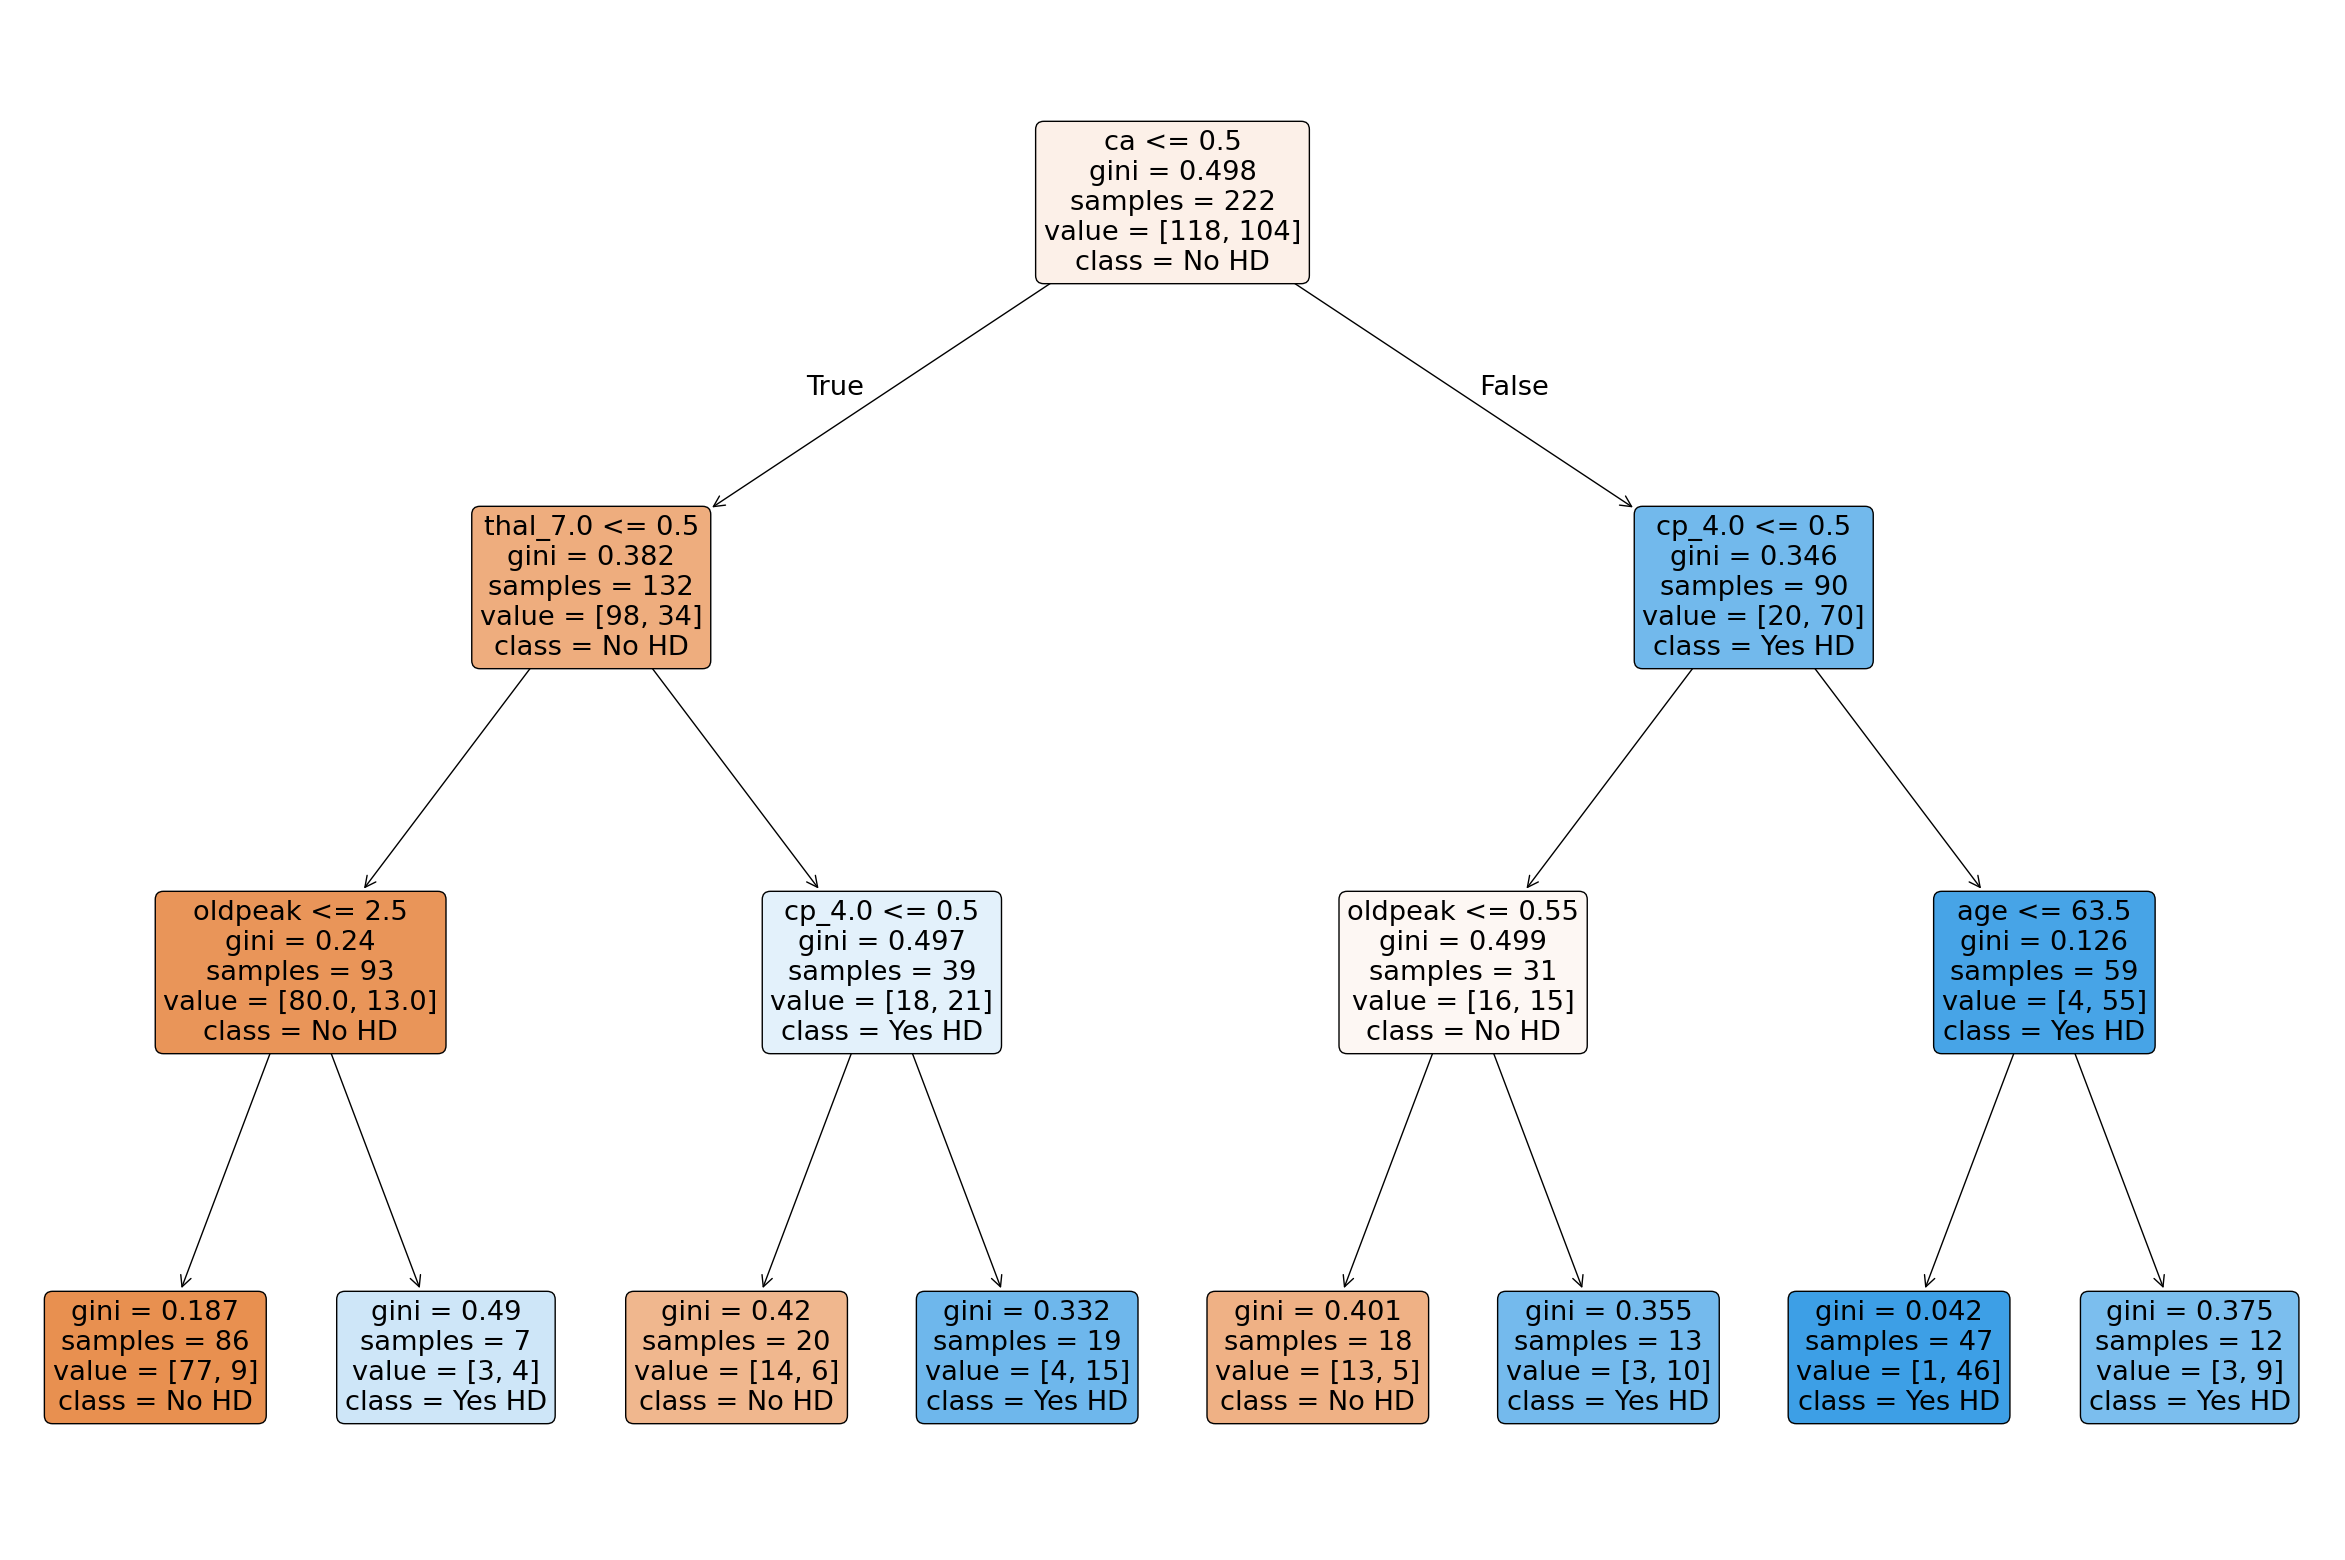

In [52]:
## NOTE: We can plot the tree and it is small!
plt.figure(figsize=(30, 20))

plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns);

In [53]:
#predictions on test using final tuned model

y_pred = clf_dt.predict(X_test)

In [54]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[34  8]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.78      0.85      0.81        33

    accuracy                           0.83        75
   macro avg       0.82      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



In [55]:
#check overfitting on the tuned model
y_pred_train = clf_dt.predict(X_train)

In [56]:
print(confusion_matrix(y_train, y_pred_train))

print(classification_report(y_train, y_pred_train))

[[104  14]
 [ 20  84]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       118
           1       0.86      0.81      0.83       104

    accuracy                           0.85       222
   macro avg       0.85      0.84      0.85       222
weighted avg       0.85      0.85      0.85       222



**Pruning**

Minimal Cost-Complexity Pruning is a method used in decision tree algorithms to reduce overfitting by trimming unnecessary branches from the tree. This process helps in creating a more generalized model that performs better on unseen data. Here’s a detailed explanation of how it works:

### 1. **Understanding the Basics**

- **Decision Tree**: A decision tree is a flowchart-like structure where each internal node represents a test on an attribute, each branch represents an outcome of the test, and each leaf node represents a class label.
- **Overfitting**: When a model learns the noise in the training data and performs poorly on new, unseen data.
- **Pruning**: The process of removing sections of the tree that provide little power in predicting target variables.

### 2. **Cost Complexity Pruning Process**

#### Step-by-Step Explanation:

1. **Grow a Full Tree**:
   - Initially, a full decision tree is grown until all leaves are pure (i.e., contain only one class) or contain less than a minimum number of samples.

2. **Calculate Impurity**:
   - The impurity of a node (leaf) can be measured using metrics like Gini impurity or entropy.
   - The total impurity of the tree is the sum of the impurities of all its leaves.

3. **Cost Complexity Measure**:
   - Define a cost complexity measure that balances the tree's size (complexity) and its fit to the training data.
   - The cost complexity measure \( R_{\alpha}(T) \) for a subtree \( T \) is defined as:
     \[
     R_{\alpha}(T) = R(T) + \alpha \cdot \left|T\right|
     \]
     where:
     - \( R(T) \) is the total impurity of the tree \( T \).
     - \( \left|T\right| \) is the number of terminal nodes (leaves) in the tree \( T \).
     - \( \alpha \) is a parameter that controls the trade-off between the complexity of the tree and its fit to the data. It is often called the complexity parameter or regularization parameter.

4. **Find the Optimal Alpha (\( \alpha \))**:
   - Different values of \( \alpha \) lead to different pruned trees.
   - As \( \alpha \) increases, the penalty for having a complex tree increases, leading to more aggressive pruning.
   - To find the optimal \( \alpha \), perform cost complexity pruning using a range of \( \alpha \) values and evaluate the resulting trees using cross-validation.

5. **Prune the Tree**:
   - Starting with the fully grown tree, iteratively remove the weakest link (i.e., the branch whose removal increases the cost complexity the least).
   - Continue pruning until the desired level of complexity (determined by the optimal \( \alpha \)) is achieved.

6. **Select the Best Tree**:
   - Use cross-validation to assess the performance of each pruned tree.
   - Select the tree with the best cross-validation score (i.e., the tree that generalizes best to unseen data).

### 3. **Practical Implementation**

Here's how the process is typically implemented in practice using a library like scikit-learn:

1. **Train the Full Tree**: Fit a decision tree to the training data without any pruning.
2. **Obtain Cost Complexity Pruning Path**: Use the `cost_complexity_pruning_path` method to obtain a series of trees pruned at different values of \( \alpha \).
3. **Cross-Validation**: For each pruned tree, perform cross-validation to find the optimal \( \alpha \).
4. **Select and Fit the Final Model**: Choose the tree corresponding to the optimal \( \alpha \) and fit it to the training data.


In [57]:

### Example Code Snippet
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data
## split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

# Train the full decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
# Obtain cost complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [59]:
ccp_alphas

array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00514801, 0.00541298, 0.00578761, 0.00600601,
       0.00600601, 0.00600601, 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523, 0.13046216])

In [60]:
# Train decision trees using different alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Evaluate the models using cross-validation
cv_scores = [cross_val_score(clf, X_train, y_train, cv=5).mean() for clf in clfs]
cv_scores

[np.float64(0.6934343434343434),
 np.float64(0.6934343434343434),
 np.float64(0.6934343434343434),
 np.float64(0.6934343434343434),
 np.float64(0.6934343434343434),
 np.float64(0.6934343434343434),
 np.float64(0.6888888888888889),
 np.float64(0.6934343434343434),
 np.float64(0.7116161616161616),
 np.float64(0.7116161616161616),
 np.float64(0.7116161616161616),
 np.float64(0.7116161616161616),
 np.float64(0.7116161616161616),
 np.float64(0.7116161616161616),
 np.float64(0.7025252525252526),
 np.float64(0.7115151515151515),
 np.float64(0.7159595959595959),
 np.float64(0.7159595959595959),
 np.float64(0.7116161616161616),
 np.float64(0.7161616161616161),
 np.float64(0.7523232323232323),
 np.float64(0.7345454545454546),
 np.float64(0.7345454545454546),
 np.float64(0.7027272727272728),
 np.float64(0.666969696969697),
 np.float64(0.666969696969697),
 np.float64(0.5584848484848485)]

In [61]:

# Find the optimal alpha
optimal_alpha_index = np.argmax(cv_scores)
optimal_alpha = ccp_alphas[optimal_alpha_index]
optimal_alpha

np.float64(0.014224751066856332)

In [62]:
# Train the final decision tree model with the optimal alpha
final_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
final_clf.fit(X_train, y_train)

# Evaluate the final model
final_accuracy = final_clf.score(X_test, y_test)
final_accuracy

0.8266666666666667

In [63]:
y_pred = final_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[34  8]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.78      0.85      0.81        33

    accuracy                           0.83        75
   macro avg       0.82      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



In [64]:
y_predtrain = final_clf.predict(X_train)

print(confusion_matrix(y_train, y_predtrain))
print(classification_report(y_train, y_predtrain))

[[105  13]
 [ 20  84]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       118
           1       0.87      0.81      0.84       104

    accuracy                           0.85       222
   macro avg       0.85      0.85      0.85       222
weighted avg       0.85      0.85      0.85       222



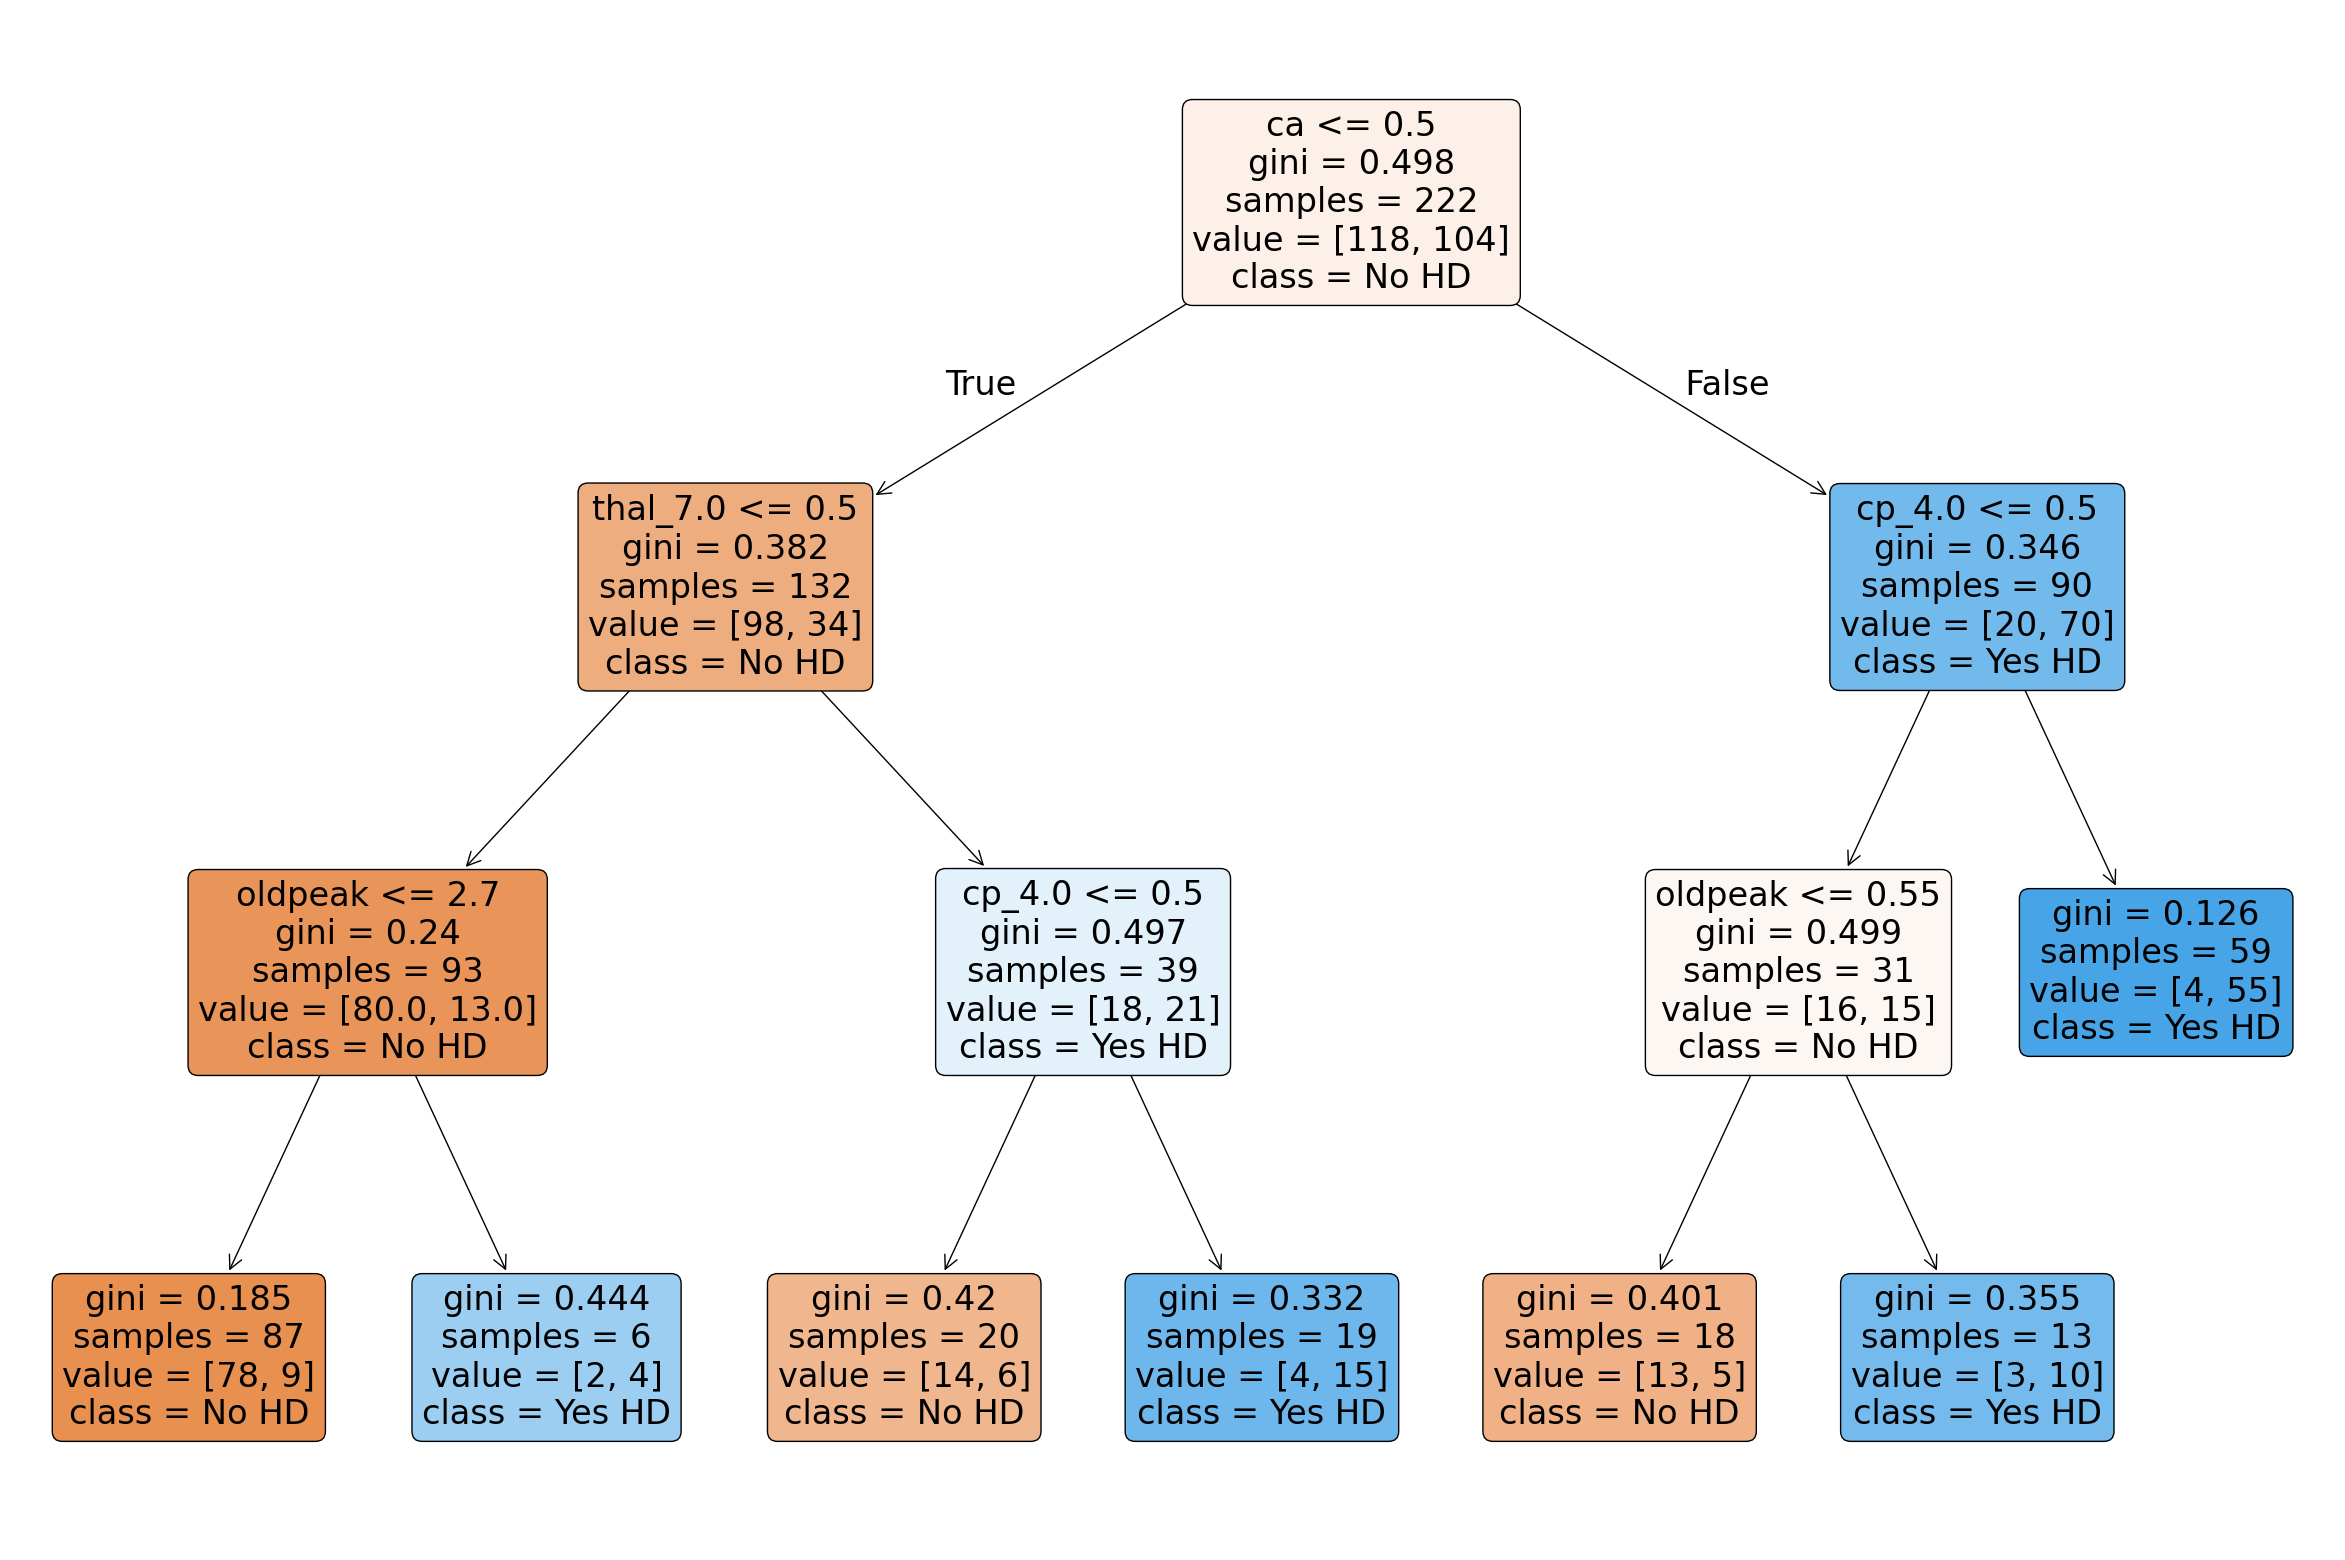

In [65]:
## NOTE: We can plot the tree and it is small!
plt.figure(figsize=(30, 20))

plot_tree(final_clf,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns);



This process ensures that the decision tree is pruned to the optimal level, balancing the trade-off between complexity and performance, resulting in a more robust model.

### Random Forest

In [81]:
## split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
# Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data
rf = RandomForestClassifier(random_state=42)

#dictionary of the hyperparameters to be tuned
params = {
    'max_depth': [2,3],
    'min_samples_leaf': range(1,20),
    'n_estimators': range(15,20)
}

In [85]:
from sklearn.model_selection import GridSearchCV

In [87]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           scoring="accuracy")

In [88]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': range(1, 20),
                         'n_estimators': range(15, 20)},
             scoring='accuracy')

In [72]:
rf_best = grid_search.best_estimator_
rf_best


RandomForestClassifier(max_depth=2, min_samples_leaf=10, n_estimators=17,
                       random_state=42)

In [73]:
y_pred = rf_best.predict(X_test)

In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.90      0.82      0.86        33

    accuracy                           0.88        75
   macro avg       0.88      0.87      0.88        75
weighted avg       0.88      0.88      0.88        75



In [75]:
y_pred_train = rf_best.predict(X_train)

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       118
           1       0.91      0.77      0.83       104

    accuracy                           0.86       222
   macro avg       0.86      0.85      0.85       222
weighted avg       0.86      0.86      0.85       222



In [77]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1])

In [78]:
rf_best.feature_importances_

array([0.04134649, 0.03042965, 0.        , 0.03000412, 0.        ,
       0.07573129, 0.05932608, 0.08830042, 0.24071566, 0.        ,
       0.        , 0.0213373 , 0.1902499 , 0.0035264 , 0.        ,
       0.00844865, 0.02804853, 0.00372755, 0.        , 0.12610472,
       0.        , 0.05270324])

In [79]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df

,Varname,Imp
0,age,0.041346
1,sex,0.030430
2,restbp,0.000000
3,chol,0.030004
4,fbs,0.000000
5,thalach,0.075731
6,exang,0.059326
7,oldpeak,0.088300
8,ca,0.240716
9,cp_1.0,0.000000


cp, chest pain, Category
1 = typical angina
2 = atypical angina
3 = non-anginal pain
4 = asymptomatic

In [80]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
8,ca,0.240716
12,cp_4.0,0.190250
19,thal_3.0,0.126105
7,oldpeak,0.088300
5,thalach,0.075731
6,exang,0.059326
21,thal_7.0,0.052703
0,age,0.041346
1,sex,0.030430
3,chol,0.030004


----